In [1028]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1029]:
df=pd.read_csv("HDFC.csv",index_col='Date',parse_dates=True)

In [1030]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327


# Data Preprocessing

In [1031]:
df['Date']=df.index

In [1032]:
start_date='2020-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [1033]:
df=df.loc[mask]

In [1034]:
df=df.ffill()

In [1035]:
df['Prev Close'].isnull().values.any()

False

In [1036]:
df=df.drop(columns=['Date','Symbol','Series'])

In [1037]:
df.dropna(inplace=True)

<AxesSubplot:>

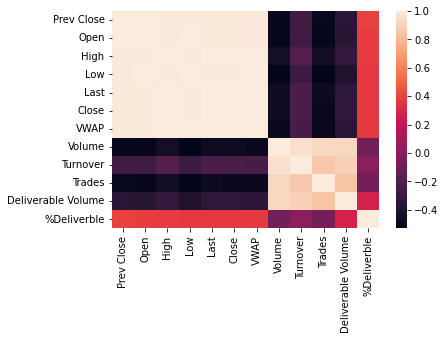

In [1038]:
sn.heatmap(df.corr())

In [1039]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=262, freq='B')

In [1040]:
df=df.ffill(axis=0)
df['Prev Close'].isnull().values.any()

False

In [1041]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest,3]
test=df.iloc[-Ntest:,3]

In [1042]:
Decomp_results=seasonal_decompose(df['Prev Close'])

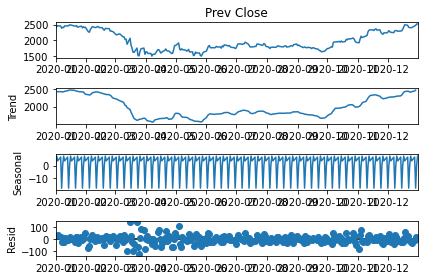

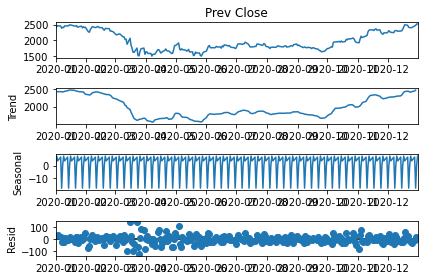

In [1043]:
Decomp_results.plot()

In [1044]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:-Ntest]
exo_test=exo.iloc[-Ntest:]


In [1045]:
exo=exo.asfreq('B')
exo.ffill()
exo=np.nan_to_num(exo)

In [1046]:
auto_arima(df['Prev Close'],exogenous=exo,m=1,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1310.590, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1223.336, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1301.275, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1254.490, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=445.856, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1306.673, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1300.028, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1308.599, Time=0.39 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-141.946, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1308.198, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1306.302, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1311.176, Time=0.39 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1313.681, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1310.324, Time=0.36 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1312.761, Time=0.39 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1310.470, Time=0.43 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1291.963, Time=0.37 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 6.001 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  262
Model:               SARIMAX(3, 0, 0)   Log Likelihood                 672.841
Date:                Sun, 25 Sep 2022   AIC                          -1313.681
Time:                        11:39:50   BIC                          -1256.588
Sample:                             0   HQIC                         -1290.734
                                - 262                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0175   5.44e-34   3.21e+31      0.000       0.017       0.017
x1             1.0000   2.92e-31   3.42e+30      0.000       1.000       1.000
x2          2.665e-15   2.93e-31   9.08e+15      0.000    2.66e-15    2.66e-15
x3         -4.441e-15   3.36e-31  -1.32e+16      0.000   -4.44e-15   -4.44e-15
x4          8.882e-16   2.91e-31   3.05e+15      0.000    8.88e-16    8.88e-16
x5          3.553e-15   3.32e-31   1.07e+16      0.000    3.55e-15    3.55e-15
x6         -1.066e-14   3.34e-31  -3.19e+16      0.000   -1.07e-14   -1.07e-14
x7         -4.441e-16    3.2e-31  -1.39e+15      0.000   -4.44e-16   -4.44e-16
x8         -1.775e-17   4.33e-27   -4.1e+09      0.000   -1.78e-17   -1.78e-17
x9         -4.794e-17   8.44e-19    -56.789      0.000   -4.96e-17   -4.63e-17
x10         1.171e-17   1.18e-28   9.93e+10      0.000    1.17e-17    1.17e-17
x11        -2.275e-17   1.94e-27  -1.17e+10      0.000   -2.27e-17   -2.27e-17
ar.L1          0.3721   2.12e-35   1.76e+34      0.000       0.372       0.372
ar.L2          0.1422   2.02e-35   7.03e+33      0.000       0.142       0.142
ar.L3          0.1435   1.97e-35   7.28e+33      0.000       0.144       0.144
sigma2         0.0003   4.28e-32      8e+27      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               438.96
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                             1.59
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.05e+49. Standard errors may be unstable.
"""

# ARIMAX

In [1047]:
model_arimax=ARIMA(train,exog=exo_train,order=(3,0,0))

Model_arimax=model_arimax.fit()

Model_arimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    Low   No. Observations:                  184
Model:                     ARMA(3, 0)   Log Likelihood                 842.603
Method:                       css-mle   S.D. of innovations             42.638
Date:                Sun, 25 Sep 2022   AIC                          -1653.207
Time:                        11:39:50   BIC                          -1601.768
Sample:                    01-01-2020   HQIC                         -1632.358
                         - 09-14-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0010      0.008     -0.122      0.903      -0.016       0.014
Prev Close           1.68e-07   5.76e-06      0.029      0.977   -1.11e-05    1.15e-05
Open                2.999e-07   1.29e-05      0.023      0.982   -2.51e-05    2.57e-05
High               -1.032e-06   1.54e-05     -0.067      0.947   -3.13e-05    2.92e-05
Low                    1.0000        nan        nan        nan         nan         nan
Last                3.422e-07   2.69e-05      0.013      0.990   -5.24e-05    5.31e-05
Close              -7.142e-07   3.18e-05     -0.022      0.982    -6.3e-05    6.16e-05
VWAP                2.318e-06   1.19e-05      0.195      0.845    -2.1e-05    2.56e-05
Volume              1.563e-10   3.97e-08      0.004      0.997   -7.76e-08    7.79e-08
Turnover             5.25e-18   3.27e-08   1.61e-10      1.000    -6.4e-08     6.4e-08
Trades              7.956e-11   3.42e-08      0.002      0.998   -6.69e-08    6.71e-08
Deliverable Volume -4.147e-11   4.06e-08     -0.001      0.999   -7.96e-08    7.95e-08
ar.L1.Low              0.4184      0.096      4.373      0.000       0.231       0.606
ar.L2.Low              0.1943      0.103      1.893      0.058      -0.007       0.395
ar.L3.Low              0.1484      0.087      1.713      0.087      -0.021       0.318
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1747           -0.0000j            1.1747           -0.0000
AR.2           -1.2420           -2.0482j            2.3954           -0.3368
AR.3           -1.2420           +2.0482j            2.3954            0.3368
-----------------------------------------------------------------------------
"""

# SARIMAX

In [1048]:
model_sarimax=SARIMAX(train,exog=exo_train,order=(3,0,0),seasonal_order=(0,0,0,0) )

Model_sarimax=model_sarimax.fit()

Model_sarimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                  184
Model:               SARIMAX(3, 0, 0)   Log Likelihood                 513.508
Date:                Sun, 25 Sep 2022   AIC                           -997.016
Time:                        11:39:51   BIC                           -948.792
Sample:                    01-01-2020   HQIC                          -977.471
                         - 09-14-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close          4.394e-13   2.24e-32   1.96e+19      0.000    4.39e-13    4.39e-13
Open                1.377e-14   3.78e-33   3.65e+18      0.000    1.38e-14    1.38e-14
High               -2.007e-13   1.16e-31  -1.73e+18      0.000   -2.01e-13   -2.01e-13
Low                    1.0000   2.49e-33   4.01e+32      0.000       1.000       1.000
Last                1.625e-12   1.22e-31   1.33e+19      0.000    1.63e-12    1.63e-12
Close              -1.305e-12   1.18e-31  -1.11e+19      0.000    -1.3e-12    -1.3e-12
VWAP                6.266e-13   7.93e-32    7.9e+18      0.000    6.27e-13    6.27e-13
Volume              8.348e-18   7.19e-27   1.16e+09      0.000    8.35e-18    8.35e-18
Turnover           -4.301e-17   1.42e-18    -30.375      0.000   -4.58e-17   -4.02e-17
Trades              -3.09e-17    1.4e-28   -2.2e+11      0.000   -3.09e-17   -3.09e-17
Deliverable Volume -1.142e-16   3.73e-27  -3.06e+10      0.000   -1.14e-16   -1.14e-16
ar.L1                  0.4776   3.15e-35   1.52e+34      0.000       0.478       0.478
ar.L2                  0.2673   3.03e-35   8.83e+33      0.000       0.267       0.267
ar.L3                  0.2284   2.85e-35      8e+33      0.000       0.228       0.228
sigma2                 0.0002   1.11e-31   1.98e+27      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                48.24
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.83
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+49. Standard errors may be unstable.
"""

# Prediction

In [1049]:
start_len=len(train)
end_len=len(train)+len(test)-1

In [1050]:
pred_arimax=Model_arimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

In [1051]:
pred_sarimax=Model_sarimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

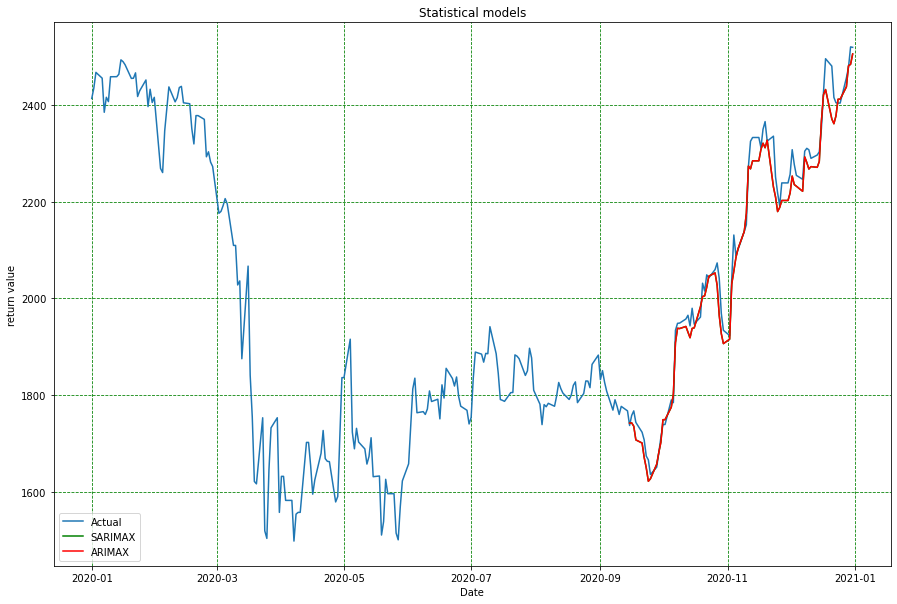

In [1052]:
plt.figure(figsize=(15,10))
plt.plot(df['Prev Close'],label='Actual')
plt.plot(pred_sarimax,label='SARIMAX',color='green')
plt.plot(pred_arimax,label='ARIMAX',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [1053]:
len(pred_arimax)
test=df['Prev Close'].iloc[-len(pred_arimax):]

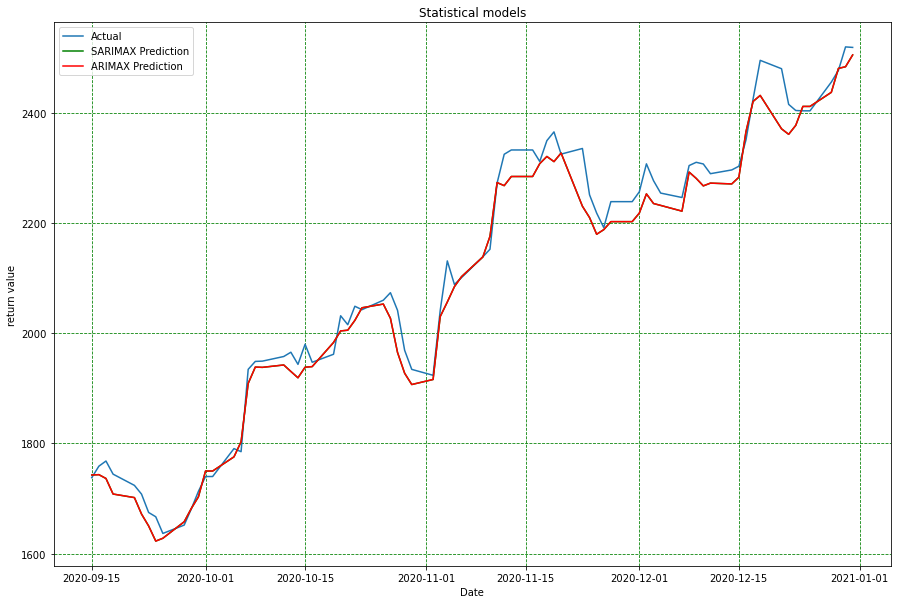

In [1054]:
plt.figure(figsize=(15,10))
plt.plot(test,label='Actual')
plt.plot(pred_sarimax,label='SARIMAX Prediction',color='green')
plt.plot(pred_arimax,label='ARIMAX Prediction',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

# Evaluation

    ARIMAX

In [1055]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_arimax))
print(rmse)

34.473034301410124


In [1056]:
error=mean_absolute_error(test,pred_arimax)
print(error)

26.420254980580513


In [1057]:
r2_score(test,pred_arimax)

0.9815986487710238

    SARIMAX

In [1058]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_sarimax))
print(rmse)

34.49730936426584


In [1059]:
error=mean_absolute_error(test,pred_sarimax)
print(error)

26.441360769035484


In [1060]:
r2_score(test,pred_sarimax)

0.9815727240886036